# Heart Disease Research

In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis. The principal investigators responsible for data collection were:

- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Load the full dataset as heart, then split into two subsets:

- yes_hd, which contains data for patients with heart disease
- no_hd, which contains data for patients without heart disease

For this project, we’ll investigate the following variables:

- chol: serum cholestorol in mg/dl
- fbs: An indicator for whether fasting blood sugar is greater than 120 mg/dl (1 = true; 0 = false)

To start, we’ll investigate cholesterol levels for patients with heart disease. Use the dataset yes_hd to save cholesterol levels for patients with heart disease as a variable named chol_hd.

In [140]:
# To begin, I will first import all relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inspect the Data

It should contain the following variables:

- age: age in years
- sex: sex assigned at birth; 'male' or 'female'
- trestbps: resting blood pressure in mm Hg
- chol: serum cholesterol in mg/dl
- cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
- fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- thalach: maximum heart rate achieved in exercise test
- heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

In [141]:
#I will then load the data and also set out the variables first.

heart = pd.read_csv('heart_disease.csv')
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

print(heart)

      age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0    63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1    67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2    67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3    37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4    41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   
..    ...     ...       ...    ...               ...    ...  ...      ...   
298  45.0    male     110.0  264.0    typical angina    0.0  0.0    132.0   
299  68.0    male     144.0  193.0      asymptomatic    0.0  1.0    141.0   
300  57.0    male     130.0  131.0      asymptomatic    1.0  0.0    115.0   
301  57.0  female     130.0  236.0   atypical angina    0.0  0.0    174.0   
302  38.0    male     138.0  175.0  non-anginal pain    0.0  0.0    173.0   

    heart_disease  
0         absence  
1        presence  
2        presen

In general, total cholesterol over 240 mg/dl is considered “high” (and therefore unhealthy). Calculate the mean cholesterol level for patients who were diagnosed with heart disease and print it out. Is it higher than 240 mg/dl?

Mean Cholesterol Level is 251.4748201438849 for patients with heart disease.


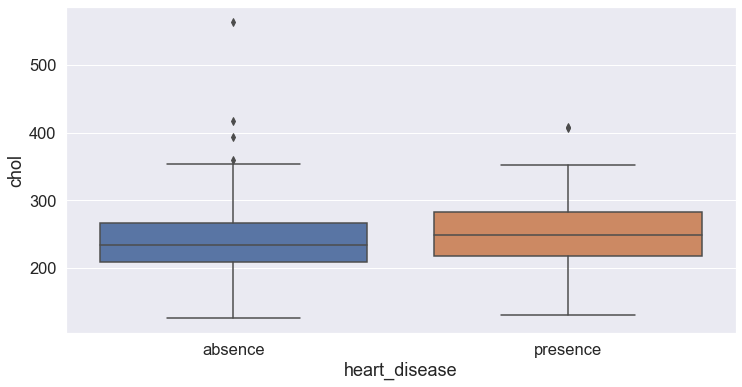

<Figure size 864x432 with 0 Axes>

In [142]:
#To investigate cholesterol levels for patients with heart diseases
chol_hd = yes_hd.chol

#To calculate the mean cholesterol level for patients who were diagnosed with heart disease
mean_chol_hd = np.mean(chol_hd)
print('Mean Cholesterol Level is ' + str(mean_chol_hd) + ' for patients with heart disease.')

sns.set(font_scale = 1.5, rc={'figure.figsize':(12,6)})
sns.boxplot(x=heart.heart_disease, y=heart.chol)
plt.show()
plt.clf()

Do people with heart disease have high cholesterol levels (greater than or equal to 240 mg/dl) on average? Import the function from scipy.stats that you can use to test the following null and alternative hypotheses:

- Null: People with heart disease have an average cholesterol level equal to 240 mg/dl
- Alternative: People with heart disease have an average cholesterol level that is greater than 240 mg/dl

Note: Unfortunately, the scipy.stats function we’ve been using does not (at the time of writing) have an alternative parameter to change the alternative hypothesis for this test. Therefore, you’ll have to run a two-sided test. However, since you calculated earlier that the average cholesterol level for heart disease patients is greater than 240 mg/dl, you can calculate the p-value for the one-sided test indicated above simply by dividing the two-sided p-value in half.

Can you conclude that heart disease patients have an average cholesterol level significantly greater than 240 mg/dl? Use a significance threshold of 0.05.

In [143]:
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(chol_hd, 240)
print('p-value is ' + str(pval/2) + '.')

p-value is 0.0035411033905155707.


Obtained a value of 0.0035 which is below the significance threshold level of 0.05, which means patients with heart diseases have an average cholesterol level significantly higher than 240 mg/dl.

Repeat steps 1-4 in order to run the same hypothesis test, but for patients in the sample who were not diagnosed with heart disease. Do patients without heart disease have average cholesterol levels significantly above 240 mg/dl?

In [144]:
#To further strengthen our findings, we will run a similar hypothesis test from the 'no heart diseases' standpoint
chol_no_hd = no_hd.chol
mean_chol_no_hd = np.mean(chol_no_hd)
print('Mean Cholesterol Level is ' + str(mean_chol_no_hd) + ' for patients without heart disease.')
tstat, pval = ttest_1samp(chol_no_hd, 240)
print('p-value is ' + str(pval/2) + '.')

Mean Cholesterol Level is 242.640243902439 for patients without heart disease.
p-value is 0.26397120232220506.


Obtained 0.26 which is above the significance threshold level of 0.05, which means that patients without heart diseases have an average cholesterol level not significantly higher than 240 mg/dl.

# Fasting Blood Sugar Analysis

Let’s now return to the full dataset (saved as heart). How many patients are there in this dataset? Save the number of patients as num_patients and print it out.

In [145]:
#To calculate the total number of patients within the data
num_patients = len(heart)
print('The data has a total number of ' + str(num_patients) + ' patients.')

The data has a total number of 303 patients.


Remember that the fbs column of this dataset indicates whether or not a patient’s fasting blood sugar was greater than 120 mg/dl (1 means that their fasting blood sugar was greater than 120 mg/dl; 0 means it was less than or equal to 120 mg/dl).

Calculate the number of patients with fasting blood sugar greater than 120. Save this number as num_highfbs_patients and print it out.

In [146]:
#To calculate the total number of patients with fasting blood sugar greater than 120 mg/dl.
num_highfbs_patients = np.sum(heart.fbs)
print('Total number of patients with fasting blood sugar greater than 120 mg/dl is ' + str(num_highfbs_patients) + '.')

Total number of patients with fasting blood sugar greater than 120 mg/dl is 45.0.


Sometimes, part of an analysis will involve comparing a sample to known population values to see if the sample appears to be representative of the general population.

By some estimates, about 8% of the U.S. population had diabetes (diagnosed or undiagnosed) in 1988 when this data was collected. While there are multiple tests that contribute to a diabetes diagnosis, fasting blood sugar levels greater than 120 mg/dl can be indicative of diabetes (or at least, pre-diabetes). If this sample were representative of the population, approximately how many people would you expect to have diabetes? Calculate and print out this number.

Is this value similar to the number of patients with a resting blood sugar above 120 mg/dl — or different?

In [147]:
#To estimate approximately how many patients within this data has diabetes based on the information provided. 8% of US population had diabetes (diagnosed or undiagnosed).
num_diabetes = len(heart)*0.08
print('Patients with diabetes is approximately ' + str(num_diabetes)[:2] + ' people.')

Patients with diabetes is approximately 24 people.


Does this sample come from a population in which the rate of fbs > 120 mg/dl is equal to 8%? Import the function from scipy.stats that you can use to test the following null and alternative hypotheses:

Null: This sample was drawn from a population where 8% of people have fasting blood sugar > 120 mg/dl
Alternative: This sample was drawn from a population where more than 8% of people have fasting blood sugar > 120 mg/dl

In [148]:
#To run a hypothesis on the data with binomial distribution
from scipy.stats import binom_test
pval = binom_test(num_highfbs_patients, num_patients, .08, alternative='greater')
print('p-value is ' + str(pval) + '.')

p-value is 4.689471951448875e-05.


A p-value of 4.689471951449078e-05 which is equivalent to 0.0000469 (the e-5 at the end indicates scientific notation) is obtained. This is less than 0.05, which suggest that alternative hypothesis is true. Indicating that this sample likely comes from a population where more than 8% of people have fbs > 120 mg/dl. 

# Predictors of Heart Disease

Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use sns.boxplot() to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

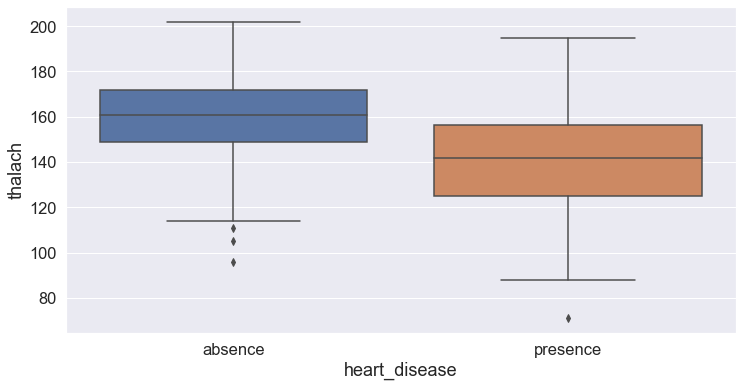

<Figure size 864x432 with 0 Axes>

In [149]:
sns.set(font_scale = 1.5, rc={'figure.figsize':(12,6)})
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()
plt.clf()

In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named thalach_hd. Then save the values of thalach among patients who were not diagnosed with heart disease as thalach_no_hd.

In [150]:
#Saving values of heart disease patients and non heart disease patients

thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [151]:
#Calculating the mean and median differences between heart disease patients and non heart disease patients.

mean_diff = np.mean(thalach_no_hd) - np.mean(thalach_hd)
print('thalach mean Difference: ' + str(mean_diff)[:4])

median_diff = np.median(thalach_no_hd) - np.median(thalach_hd)
print('thalach median Difference: ', median_diff)

thalach mean Difference: 19.1
thalach median Difference:  19.0


We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from scipy.stats that we would use to test the following null and alternative hypotheses:

- Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

Using a significance threshold of 0.05, is there a significant difference in average thalach for people with heart disease compared to people with no heart disease?

In [152]:
#This is performing a two-sample t-test.
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print('p-value is ' + str(pval) + '.')

p-value is 3.456964908430172e-14.


Since the p-value obtained is lower than the significance threshold of 0.05, we can conclude that the null hypothesis is rejected. This would indicate the average thalach for a person with heart disease do not equate to the average thalach of a person without heart disease.

Using the same process, investigate at least one other quantitative variable. Options include 
- age
- trestbps (resting blood pressure)

Are any of these variables also significantly associated with heart disease?

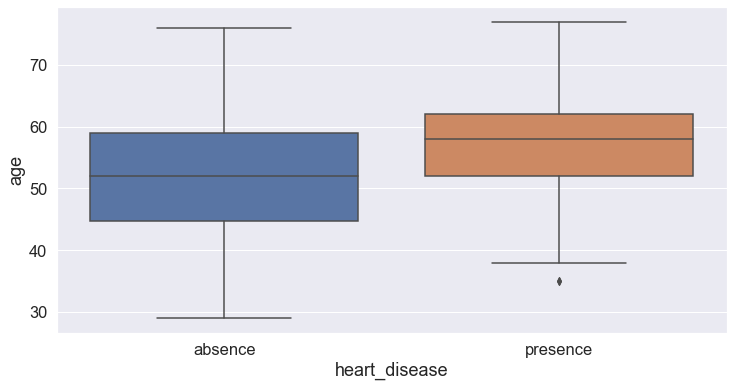

p-value is 8.955636917529706e-05.
So null hypothesis of heart disease not affected by aging is rejected, age plays a role in heart disease.


<Figure size 864x432 with 0 Axes>

In [153]:
#Running the comparison between heart disease and age
sns.set(font_scale = 1.5, rc={'figure.figsize':(12,6)})
sns.boxplot(x=heart.heart_disease, y=heart.age)
plt.show()
plt.clf()

age_hd = heart.age[heart.heart_disease == 'presence']
age_no_hd = heart.age[heart.heart_disease == 'absence']

tstat, pval = ttest_ind(age_hd, age_no_hd)
print('p-value is ' + str(pval) + '.')
print('So null hypothesis of heart disease not affected by aging is rejected, age plays a role in heart disease.')

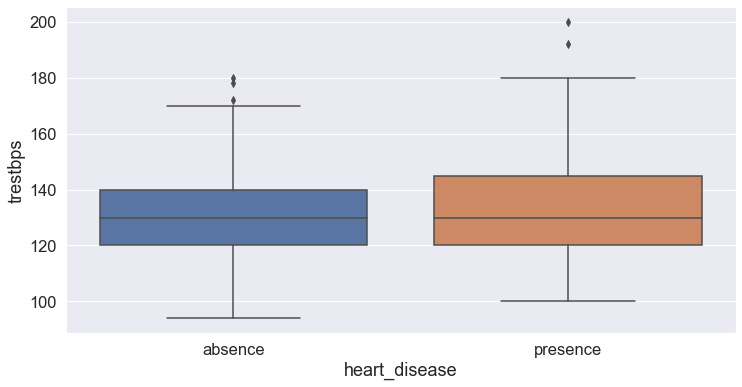

p-value is 0.008548268928594928.
So null hypothesis of resting blood pressure not being an indicator is rejected, resting blood pressure can be used to indicate heart disease.


<Figure size 864x432 with 0 Axes>

In [154]:
#Running the comparison between heart disease and trestbps (resting blood pressure)
sns.set(font_scale = 1.5, rc={'figure.figsize':(12,6)})
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()
plt.clf()

trestbps_hd = heart.trestbps[heart.heart_disease == 'presence']
trestbps_no_hd = heart.trestbps[heart.heart_disease == 'absence']

tstat, pval = ttest_ind(trestbps_hd, trestbps_no_hd)
print('p-value is ' + str(pval) + '.')
print('So null hypothesis of resting blood pressure not being an indicator is rejected, resting blood pressure can be used to indicate heart disease.')

# Chest Pain and Maximum Heart Rate (thalach)

Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data. Make sure to use plt.clf() to clear the previous plots first!

Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

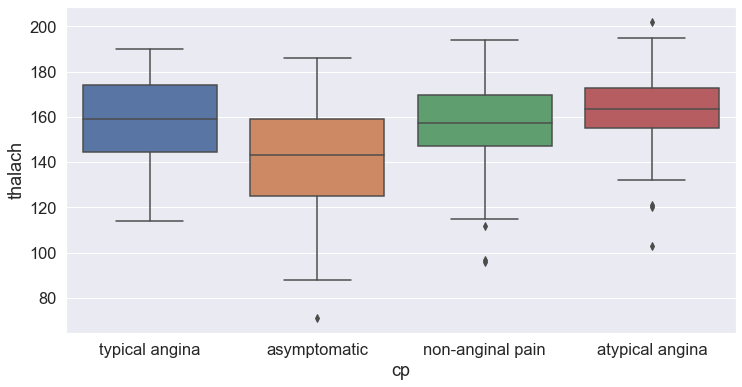

<Figure size 864x432 with 0 Axes>

In [155]:
#Plotting side-by-side subplots of thalach and each chest pain type.

sns.set(font_scale = 1.5, rc={'figure.figsize':(12,6)})
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()
plt.clf()

To investigate this further, save the values of thalach for patients who experienced each type of chest pain as
- thalach_typical
- thalach_asymptom
- thalach_nonangin
- thalach_atypical

In [168]:
thalach_typical = heart.thalach[heart.cp == 'typical']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal']
thalach_atypical = heart.thalach[heart.cp == 'atypical']

Run a single hypothesis test to address the following null and alternative hypotheses:

- Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
- Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

To calculate a p-value that has multiple samples, or in other words, non-binary categorical variable and a quantitative variable (thalach), we can use six separate two-sample t-tests or simply use an ANOVA, short for Analysis of Variance.

In [169]:
#Using ANOVA to calculate p-value
from scipy.stats import f_oneway
Fstat, pval1 = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('p-value for ANOVA: ', pval)

p-value for ANOVA:  nan


I have ran into an apparent bug when using this ANOVA feature from scipy, which I believe is due to the value being extremely small and tends to 0. This is further supported by information found online: https://github.com/scipy/scipy/issues/11669#issuecomment-599175938.

Since the p-value is extremely small, I believe I can safely reject the null hypothesis and accept that not all chest pain experiencing heart disease patients have the same average thalach.

If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach).

Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

In [172]:
# running Tukey's range test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
output = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(output)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


Based on my observations, we can clearly see that 'asymptomatic' chest pain patients seem to have a different thalach as compared to other chest pain patients. This could be because they have a lower maximum heart rate as compared to other chest pain patients.

# Heart Disease and Chest Pain

Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of cp and heart_disease and save it as Xtab, then print it out.

In [174]:
Xtab = pd.crosstab(heart.heart_disease, heart.cp)
print(Xtab)

cp             asymptomatic  atypical angina  non-anginal pain  typical angina
heart_disease                                                                 
absence                  39               41                68              16
presence                105                9                18               7


Coming to my surprise, it seems that most heart disease diagnosed patients have asymptomatic chest pain. Which is a little concerning as it would suggest, most people may have heart disease and yet not have any warning signs.

Besides that, it seems that people who do not have heart diseases, seem to have all sorts of different chest pains, which is pretty counter-intuitive!

Run a hypothesis test for the following null and alternative hypotheses:

- Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
- Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

Save the p-value as pval and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [179]:
from scipy.stats import chi2_contingency

chi2, pval, dof, exp = chi2_contingency(Xtab)
print('p-value for chi-square test: ' + str(pval) + '.')

p-value for chi-square test: 1.2517106007837527e-17.


Since the p-value is lower than the significance threshold of 0.05, the null hypothesis is rejected.

There is an association between the type of chest pain and whether or not someone is diagnosed with heart disease.